# Total Diffusion Time

Total Diffusion Time is the total time taken for the information to propagate in the network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

tweetSet='twitter16'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/'+tweetSet+'/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true']


,Label,SourceTweetID
0,False,656955120626880512
1,True,615689290706595840
2,False,613404935003217920
5,True,614467824313106432
9,False,622891631293935616
...,...,...
799,True,552806757672964097
801,True,544350567183556608
805,True,614593386188828672
811,True,650046859537448960


In [2]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [3]:
# df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
# len(df_filtered_true['SourceTweetID'].unique())
rumor_tweet_id= df_filtered['SourceTweetID'].unique()
# len(df_filtered_true['SourceTweetID'])

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/'+tweetSet+'/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        sender_tweet_id.append(filename.replace(".txt",""))
        tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
        delayVal=0
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[0]!='ROOT':
                    if float(receiver_values[2]) >delayVal:
                        delayVal=float(receiver_values[2])
#                 sender_uid.append(sender_values[0])
#                 sender_tweet_id.append(sender_values[1])
#                 sender_post_time_delay.append(float(sender_values[2]))

#                 receiver_uid.append(receiver_values[0])
#                 receiver_tweet_id.append(receiver_values[1])
#                 receiver_post_time_delay.append(float(receiver_values[2]))
                
#                 #print(int(filename.replace(".txt","")))
#                 tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
            receiver_post_time_delay.append(delayVal)
            


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_tweet_id': sender_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
# dfRoot=df_Joined[df_Joined['sender_uid'] == 'ROOT']
# df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_tweet_id,receiver_post_time_delay,tweet_label
0,498430783699554305,3213.33,True
1,500378223977721856,2288.37,True
2,524922729485848576,9092.45,True
3,524923462398513152,7548.02,True
4,524923676484177920,495.05,True
...,...,...,...
407,676718762830221312,9607.27,False
408,676870737932742656,12206.55,False
409,677099574855639044,16122.65,False
410,681147789653356544,136432.37,True


In [5]:
df_Joined = df_Joined.sort_values(by="receiver_post_time_delay", ascending=False)
df_Joined.head(30)

,sender_tweet_id,receiver_post_time_delay,tweet_label
50,544289941996326912,626139.78,True
189,614790312955904000,619297.37,True
208,620971220301787136,602930.85,False
136,612646796355960832,575980.37,False
137,612741808125120513,575406.18,False
172,614610920782888960,575218.27,True
200,618192748735299584,567629.65,False
241,637868242560638980,529730.15,False
235,634404792241143809,493018.22,False
129,594687353937100801,475048.13,False


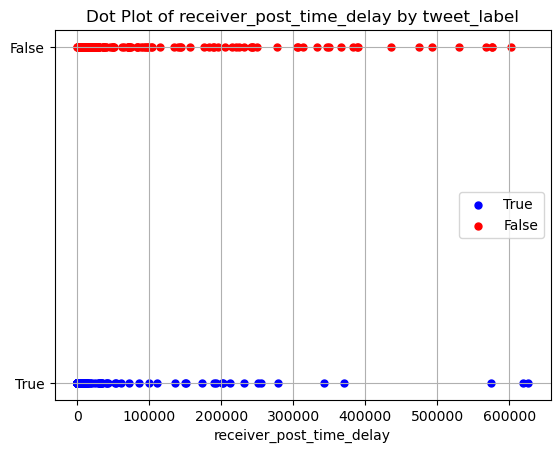

In [6]:
# Separate data by tweet_label
true_data = df_Joined[df_Joined['tweet_label'] == True]
false_data = df_Joined[df_Joined['tweet_label'] == False]
+
# Create a scatter plot with different colors
plt.scatter(true_data['receiver_post_time_delay'], [1] * len(true_data), label='True', color='blue', marker='.', s=100)
plt.scatter(false_data['receiver_post_time_delay'], [2] * len(false_data), label='False', color='red', marker='.', s=100)

# Customize plot labels and legends
plt.xlabel('receiver_post_time_delay')
plt.yticks([1, 2], ['True', 'False'])
plt.title('Dot Plot of receiver_post_time_delay by tweet_label')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Twitter 15

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

tweetSet='twitter15'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/'+tweetSet+'/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['true' 'false']


,Label,SourceTweetID
4,True,551099691702956032
7,True,514106273852174337
9,False,495366618818830336
10,False,532206910796468224
11,False,560187970389819392
...,...,...
1480,True,528242965915779072
1481,True,407205235682050048
1482,True,508002575858561024
1484,True,427780584979836929


In [9]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [10]:
# df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
# len(df_filtered_true['SourceTweetID'].unique())
rumor_tweet_id= df_filtered['SourceTweetID'].unique()
# len(df_filtered_true['SourceTweetID'])

In [11]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/'+tweetSet+'/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        sender_tweet_id.append(filename.replace(".txt",""))
        tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
        delayVal=0
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[0]!='ROOT':
                    if float(receiver_values[2]) >delayVal:
                        delayVal=float(receiver_values[2])
#                 sender_uid.append(sender_values[0])
#                 sender_tweet_id.append(sender_values[1])
#                 sender_post_time_delay.append(float(sender_values[2]))

#                 receiver_uid.append(receiver_values[0])
#                 receiver_tweet_id.append(receiver_values[1])
#                 receiver_post_time_delay.append(float(receiver_values[2]))
                
#                 #print(int(filename.replace(".txt","")))
#                 tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
            receiver_post_time_delay.append(delayVal)
            


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_tweet_id': sender_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
# dfRoot=df_Joined[df_Joined['sender_uid'] == 'ROOT']
# df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_tweet_id,receiver_post_time_delay,tweet_label
0,265953285247209472,4166.57,False
1,273182568298450945,1582487.73,False
2,273278761909239808,19972.57,False
3,295152287901417472,317035.95,True
4,295944137948151809,1440124.52,False
...,...,...,...
737,574004164570841088,3164.42,True
738,574062768896212992,4463.62,True
739,80080680482123777,938.83,False
740,80084555733803009,9492.80,False


In [12]:
df_Joined = df_Joined.sort_values(by="receiver_post_time_delay", ascending=False)
df_Joined.head(30)

,sender_tweet_id,receiver_post_time_delay,tweet_label
741,91728807081426944,2675420.55,False
1,273182568298450945,1582487.73,False
123,407234399093022720,1469879.28,True
4,295944137948151809,1440124.52,False
7,326137285450018817,1291056.45,False
5,318263294098030593,1144468.33,False
251,507242819623587841,1092591.80,True
365,519962130859429888,1035637.18,False
235,504433135036407808,1031962.12,False
24,364383457545162754,1010606.93,False


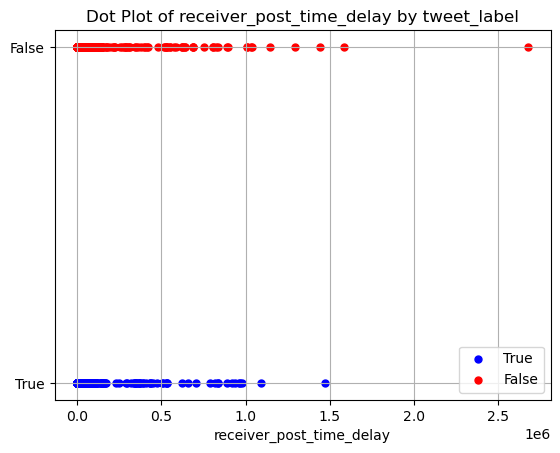

In [13]:
# Separate data by tweet_label
true_data = df_Joined[df_Joined['tweet_label'] == True]
false_data = df_Joined[df_Joined['tweet_label'] == False]

# Create a scatter plot with different colors
plt.scatter(true_data['receiver_post_time_delay'], [1] * len(true_data), label='True', color='blue', marker='.', s=100)
plt.scatter(false_data['receiver_post_time_delay'], [2] * len(false_data), label='False', color='red', marker='.', s=100)

# Customize plot labels and legends
plt.xlabel('receiver_post_time_delay')
plt.yticks([1, 2], ['True', 'False'])
plt.title('Dot Plot of receiver_post_time_delay by tweet_label')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()